 Шаг 1. Вычислим функцию выживания  S (она понадобится для шага 2) и благодаря ней получим вероятность дефолта через год. Использованы доходности безрисковых государственных облигаций Германии и рискованного эмитента - Италии. Посмотрим на значения функции 1-S(t) в точках 1,2,3,5.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
R=0.4 #recovery rate
S0=1
rg1=-0.00647
rg2=-0.0064
rg3=-0.0066
rg5=-0.00609
rc1=-0.00162
rc2=0.00025
rc3=0.00071
rc5=0.00569
def S(T,r_g,r_c):
    return 1-(1-((1+r_g)/(1+r_c))**T)/(1-R)
1-S(1,rg1,rc1)

0.008096449581655674

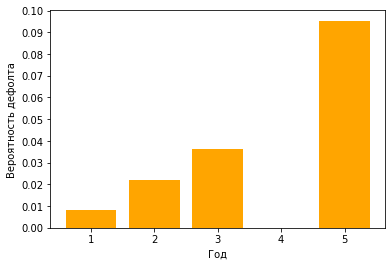

In [72]:
X=np.array([1-S(1,rg1,rc1),1-S(2,rg2,rc2),1-S(3,rg3,rc3),1-S(5,rg5,rc5)])
plt.bar([1,2,3,5],X ,color = 'orange')
plt.yticks(np.arange(0,0.11,0.01))
plt.xlabel("Год")
plt.ylabel("Вероятность дефолта")
plt.show()

Шаг 2. Напишем функцию вычисления справедливой цены свопа по заданным доходностям на 5 лет и recovery rate. Используем линейную интерполяцию.

In [53]:
def price (R,rg1,rg2,rg3,rg5,rc1,rc2,rc3,rc5):
    Si=np.zeros(21,float)
    Si[0]=S0
    Si[2]=0.5*(S(1,rg1,rc1)+Si[0])
    Si[1]=0.5*(Si[2]+Si[0])
    Si[3]= 0.5*(S(1,rg1,rc1)+Si[2])    
    Si[4]=S(1,rg1,rc1)
    Si[6]= 0.5*(S(2,rg2,rc2)+S(1,rg1,rc1))
    Si[5]= 0.5*(Si[6]+S(1,rg1,rc1))
    Si[7]= 0.5*(Si[6]+S(2,rg2,rc2))
    Si[8]=S(2,rg2,rc2)
    Si[10]= 0.5*(S(3,rg3,rc3)+S(2,rg2,rc2))
    Si[9]= 0.5*(Si[10]+S(2,rg2,rc2))
    Si[11]= 0.5*(Si[10]+S(3,rg3,rc3))
    Si[12]=S(3,rg3,rc3)
    Si[16]= 0.5*(S(5,rg5,rc5)+S(3,rg3,rc3))
    Si[14]= 0.5*(Si[16]+S(3,rg3,rc3))
    Si[13]= 0.5*(Si[14]+S(3,rg3,rc3))
    Si[15]= 0.5*(Si[14]+Si[16])
    Si[18]= 0.5*(Si[16]+S(5,rg5,rc5))
    Si[17]= 0.5*(Si[16]+Si[18])
    Si[19]= 0.5*(S(5,rg5,rc5)+Si[18])
    Si[20]=S(5,rg5,rc5)
    return 4*(1-R)*(1-Si[20])/(sum(Si)-1)


In [54]:
price(R,rg1,rg2,rg3,rg5,rc1,rc2,rc3,rc5)

0.011898671541038188

Шаг 3. Посмотрим на зависимость цены свопа от recovery rate облигации с фиксированными доходностями. Увидим, что они обратно пропорциональны. Произвольно увеличим доходности по рискованным облигациям и посмотрим на цену свопа в таком случае. Увидим, что цена увеличилась.

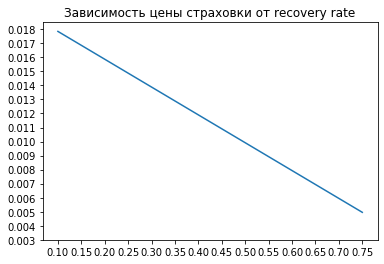

In [70]:
y=price(np.arange(0.1,0.8,0.05),rg1,rg2,rg3,rg5,rc1,rc2,rc3,rc5)
plt.plot(np.arange(0.1,0.8,0.05),y)
plt.yticks(np.arange(0.003,0.019,0.001))
plt.xticks(np.arange(0.1,0.8,0.05))
plt.title("Зависимость цены страховки от recovery rate")
plt.show()

In [69]:
Rc1=-0.00032 
Rc2=0.00085 
Rc3=0.0091
Rc5=0.00869
Y=price(R,rg1,rg2,rg3,rg5,Rc1,Rc2,Rc3,Rc5)
Y

0.015081930665118735